In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/sample_data/Company.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.2,37.8,68.4,22.1
1,44.5,39.3,45.1,10.3
2,17.2,45.9,69.3,12.5
3,151.5,41.3,58.5,16.5
4,180.8,10.7,58.4,17.9


In [5]:
data.shape

(9, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         9 non-null      float64
 1   Radio      9 non-null      float64
 2   Newspaper  9 non-null      float64
 3   Sales      9 non-null      float64
dtypes: float64(4)
memory usage: 416.0 bytes


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,9.000000,9.000000,9.000000,9.000000
mean,134.588889,31.000000,39.055556,16.177778
std,91.173481,19.001579,26.154689,5.670930
min,17.200000,3.500000,6.300000,7.500000
25%,44.500000,10.700000,13.800000,12.500000
50%,151.500000,39.300000,45.100000,16.500000
75%,180.800000,41.300000,58.500000,18.700000
max,276.900000,54.900000,69.300000,25.500000


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


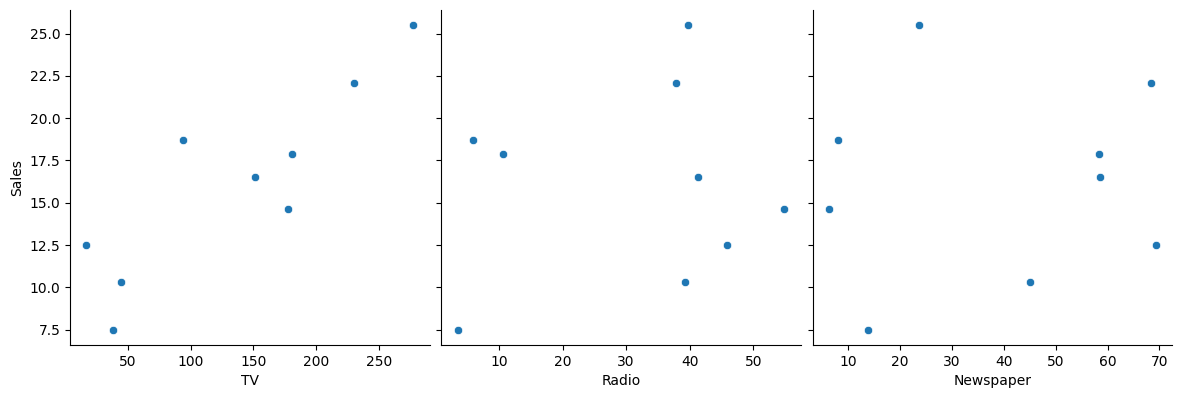

In [8]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=4, aspect=1, kind='scatter')
plt.show()

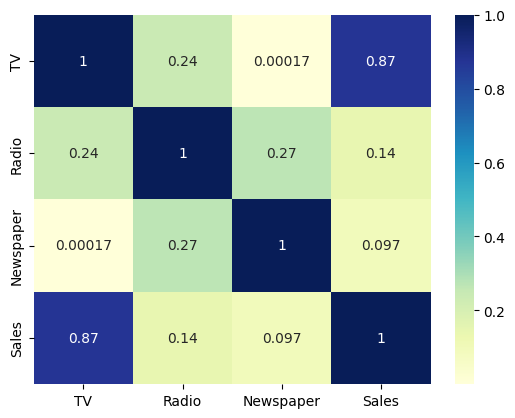

In [9]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [10]:
X = data['TV']
y = data['Sales']

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
X_train
y_train

4    17.9
2    12.5
7    14.6
3    16.5
0    22.1
8    25.5
Name: Sales, dtype: float64

In [16]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [18]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const    9.819388
TV       0.048515
dtype: float64

In [19]:
lr.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     14.41
Date:                Sun, 28 May 2023   Prob (F-statistic):             0.0192
Time:                        16:25:27   Log-Likelihood:                -12.843
No. Observations:                   6   AIC:                             29.69
Df Residuals:                       4   BIC:                             29.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8194      2.432      4.038      0.016       3.068      16.571
TV             0.0485      0.013      3.796      0.019       0.013       0.084
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.101
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.633
Skew:                          -0.736   Prob(JB):                        0.729
Kurtosis:                       2.395   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

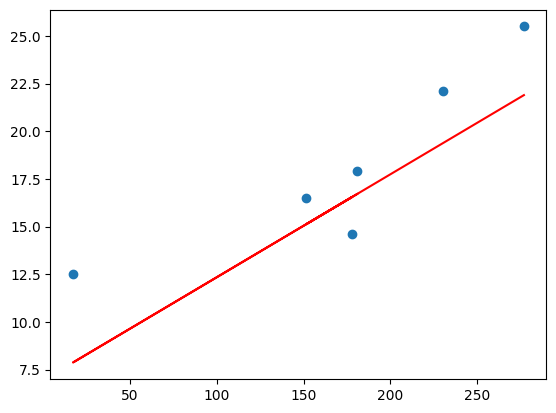

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [21]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-22-8f8e8daad6e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


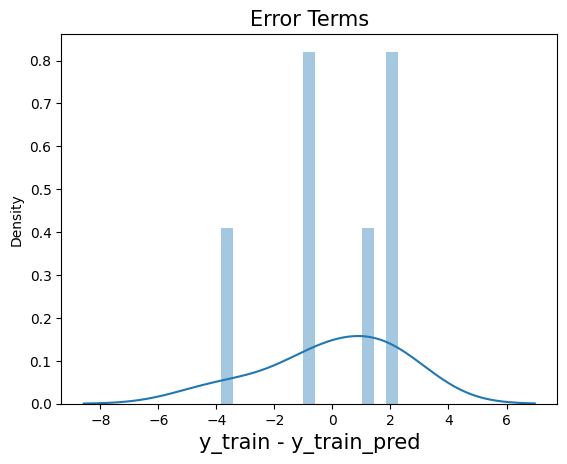

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

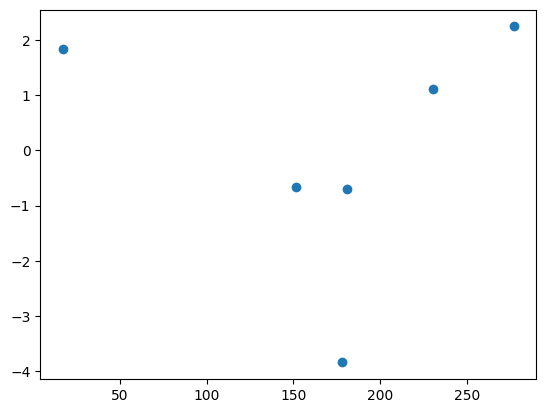

In [23]:
plt.scatter(X_train,res)
plt.show()

In [24]:
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

1    11.978295
6    14.389479
5    11.672652
dtype: float64

In [25]:
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.428841821732764

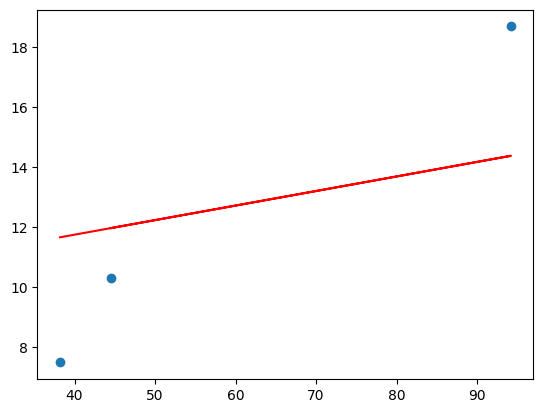

In [26]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


In [28]:
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(6, 1)
(3, 1)


In [29]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [30]:
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 9.819388476929811
Slope : [0.04851476]


In [31]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.7827198453856307
0.4288418217327631


In [35]:
from  sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [37]:
data = pd.DataFrame(data, columns = ['TV', 'Radio', 'Newspaper', 'Sales'])

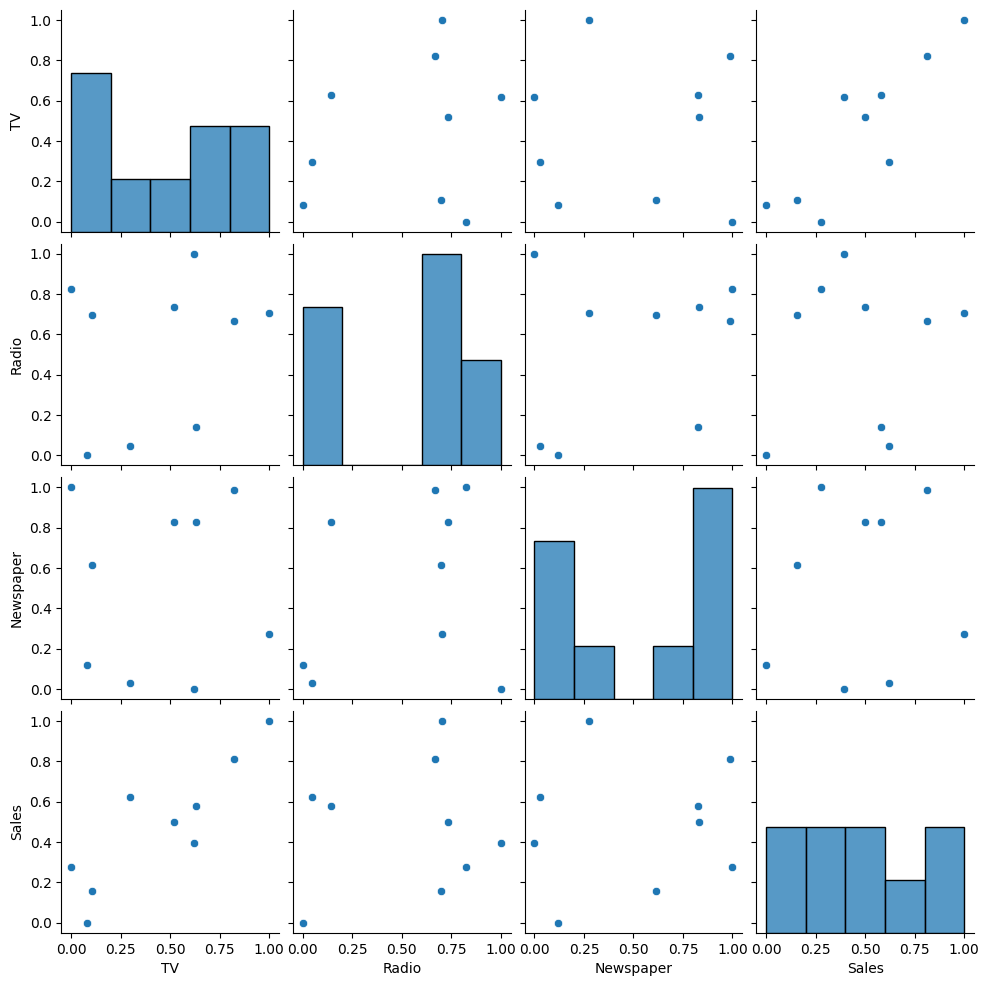

In [38]:
sns.pairplot(data)

In [34]:
df_exp = X_train
df_exp

4    180.8
2     17.2
7    177.8
3    151.5
0    230.2
8    276.9
Name: TV, dtype: float64